<a href="https://colab.research.google.com/github/hnhyhj/Python-and-CCC/blob/master/13_Dictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 13
# Dictionary

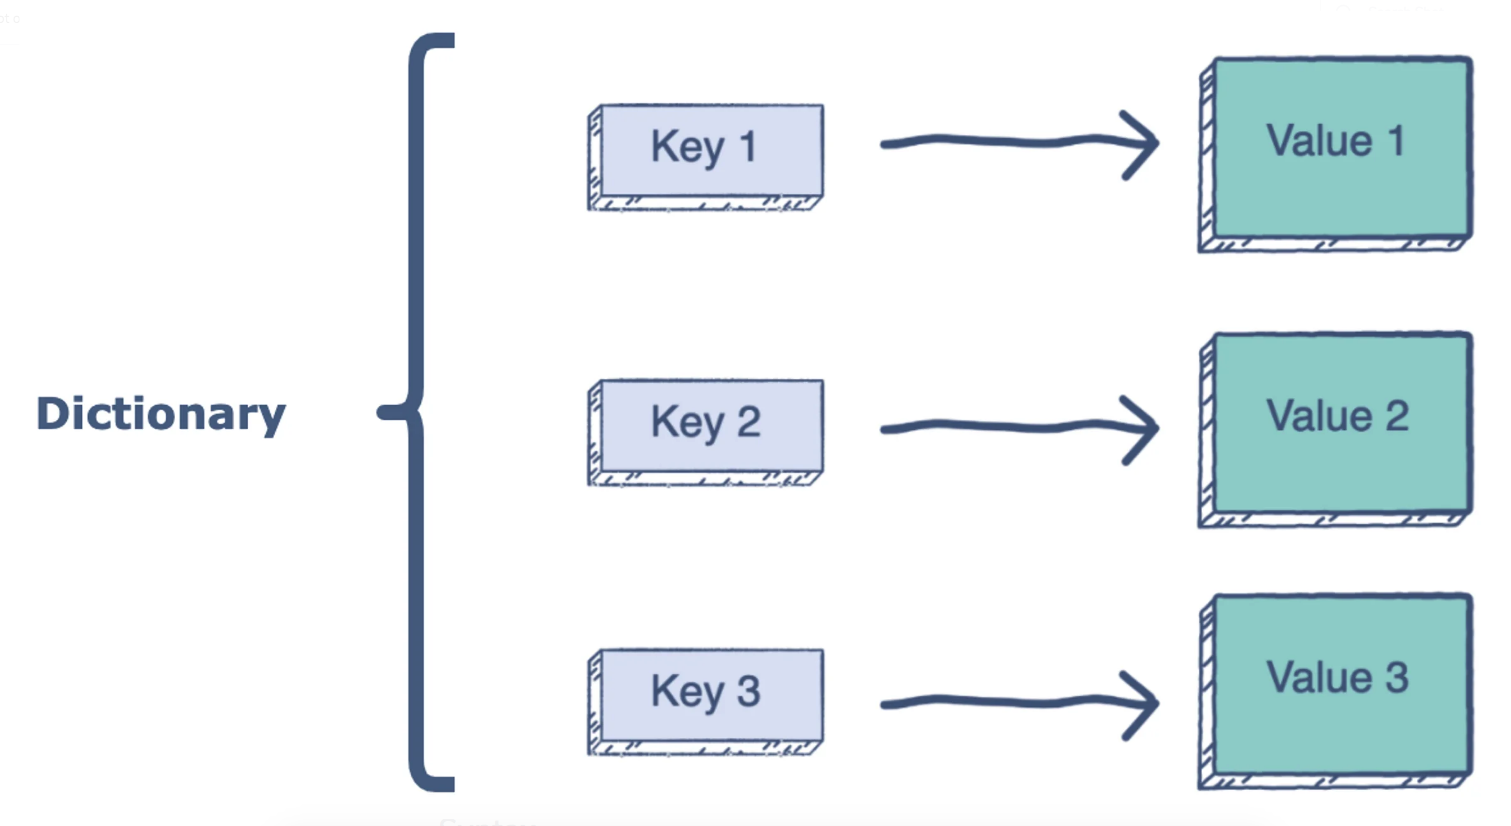

<font size = 6 > What you will learn

- Dictionaries
- Dictionary keys and values
- Dictionary methods copy( ), keys( ), values( ), items( ), and get( )
- Complicated dictionaries
- Speed differences between lists and dictionaries


Strings, tuples and lists are ordered data structures, which entails that they can be indexed.
Not all data is naturally ordered, which is why Python offers dictionaries as a way to structure unordered data.

## 13.1 Basics of dictionaries

Dictionaries are unordered collections of elements. To identify an element, you have to
know the element’s “key.”

Basically, dictionaries store “key-value pairs.” Any immutable data type can function as a
key. A very common type to use as key is the string.

You create dictionaries using curly brackets { }, similar to how you create lists using square
brackets. An empty dictionary you create by assigning { } to a variable. You can create a
dictionary with contents by describing every element of the dictionary between the curly
brackets using the syntax <key>:<value>, and commas between the elements.

To access the value belonging to a specific key, you use the same syntax as you would use
for a list, except that you write the key in the place where you would write the index for a
list.

In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50 }
print( fruitbasket["banana"] )

5


In [ ]:
for key in fruitbasket:
    print( f"{key}: {fruitbasket[key]}" )

apple: 3
banana: 5
cherry: 50


Trying to access a dictionary element using a key that is not available in the dictionary will
lead to a runtime error. However, adding a new element to a dictionary you can do by
simply assigning a value to the dictionary item identified by the new key. For instance,
adding a "mango" to the fruitbasket you can do as follows:

In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50 }
print( fruitbasket )
fruitbasket["mango"] = 1
print( fruitbasket )

In [ ]:
del fruitbasket["banana"]
print( fruitbasket )

In [ ]:
len(fruitbasket)

3

By the way, do you understand how the ordering of a dictionary works when looking at
the display of a dictionary? Think about it.

The answer is: there is no ordering. That was what I said at the start: dictionaries are
unordered. In principle I cannot even tell you what ordering you see on your screen when
you run the code above, because it might differ between computers, operating systems, and
versions of Python. There is a certain structure to the ordering of the items, but nothing
that you can (or should desire to) predict. By adding enough items, the ordering might
even suddenly change completely.

Since dictionaries are unordered, many of the concepts that are applicable to lists, do not
work on dictionaries. For instance, you cannot refer to “slices” of a dictionary, and neither
can you “sort” or “reverse” a dictionary. So dictionaries are quite limited, but they do have
their uses.

## 13.2 Dictionary methods

### 13.2.1 copy( )

Just like lists, if you assign a variable that contains a dictionary to another variable, you
are not creating a copy of the dictionary; you are actually creating an alias (if you do not
remember what an alias is, see Chapter 12). You cannot use the trick which is used for lists
to create a copy, as it uses a slice-syntax, and dictionaries do not support slices. Therefore,
there is a method copy( ) that returns a copy of a dictionary.

In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50 }
fruitbasketalias = fruitbasket
fruitbasketcopy = fruitbasket.copy()
print( id( fruitbasket ) )
print( id( fruitbasketalias ) )
print( id( fruitbasketcopy ) )

Note that this method makes a shallow copy of the dictionary (see Chapter 12 if you do not
remember the difference between shallow and deep copies). If you want to make a deep
copy, use the deepcopy() function from the copy module.

### 13.2.2 keys( ), values( ), and items( )

The method keys( ) provides an iterator that lists all the keys of a dictionary. The method
values( ) provides an iterator that lists all the values of a dictionary. The method items( )
provides an iterator that lists all the key-value pairs of a dictionary as tuples.
I specifically say that these methods returns an iterator and not a list. If you want to turn
them into lists, you have to use list casting (see Chapter 12).


In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50 }
print( list( fruitbasket.keys() ) )
print( list( fruitbasket.values() ) )
print( list( fruitbasket.items() ) )

['apple', 'banana', 'cherry']
[3, 5, 50]
[('apple', 3), ('banana', 5), ('cherry', 50)]


At this point you might be wondering when you can use an iterator. You mainly use
iterators for for loops (though you can also use them as arguments for the functions max( ),
min( ) and sum( )).

In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50, "durian":0, "mango":2 }

for key in fruitbasket.keys():
    print( "{}:{}".format( key, fruitbasket[key] ) )

print()
print( max(fruitbasket.values()) )
print( min(fruitbasket.values()) )
print( sum(fruitbasket.values()) )


apple:3
banana:5
cherry:50
durian:0
mango:2

50
0
60


Since this code provides an unpredictable order for the keys, you might want to sort them
before looping over them. Since keys( ) does not provide a list, it cannot be sorted directly,
but you can turn the result into a list using list casting. After doing that, you can sort.

In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50, "durian":0, "mango":2 }
keylist = list( fruitbasket.keys() )
keylist.sort()

for key in keylist:
    print( f"{key}: {fruitbasket[key]}" ) 

apple: 3
banana: 5
cherry: 50
durian: 0
mango: 2


### 13.2.3 get( )

The get( ) method can be used to get a value from a dictionary even when you do not
know if the key for which you seek the value exists. You call the get( ) method with the
key you are looking for, and it will return the corresponding value when the key exists in
the dictionary, or the special value **None** when the key does not exist in the dictionary. If
you want to return a specific value instead of **None** if the key does not exist, you can add
that value as a second argument to the method.

In [ ]:
fruitbasket = { "apple":3, "banana":5, "cherry":50, "durian":0, "mango":2 }

apple = fruitbasket.get( "apple" )
if apple:
    print( "apple is in the basket" )
else:
    print( "no apples in the basket")

orange = fruitbasket.get( "orange" )
if orange:
    print( "orange is in the basket" )
else:
    print( "no oranges in the basket")

banana = fruitbasket.get( "banana", 0 )
print( "number of bananas in the basket:", banana )

strawberry = fruitbasket.get( "strawberry", 0 )
print( "number of strawberries in the basket:", strawberry )

apple is in the basket
no oranges in the basket
number of bananas in the basket: 5
number of strawberries in the basket: 0


Run and study the example above closely, as what it demonstrates about the get( ) method
is very useful. Suppose that you store a collection of items with corresponding quantities, for instance, the contents of a fruit basket with the keys being the names of the fruits and
the values being the quantities. When you query the fruitbasket using the get( ) method
with a second parameter zero, you can look for any fruit in the basket without the need to
check first if the fruit exists in the basket, because if you ask for a fruit that is not there, the
get( ) method returns zero, which is exactly what you want to hear.

## 13.3 Keys
As I said, any immutable data type can be a dictionary key. This means that strings, integers, and floats can all be used as keys. You may remember that tuples are also immutable,
which entails that you can use tuples as keys. This can occasionally be useful.
A very straightforward example of tuples being useful as keys is a dictionary in which you
want to store information associated with points in two-dimensional space (a discussion
of which was given in Chapter 11). There is no good way in which you can store the
identification of a point in a single number or string. It is not impossible (for instance, you
could store the number-pair as their string-representations, concatenated with a comma in
between) but it becomes ambiguous and convoluted (for instance, the string-keys "2,3",
"2, 3", "+2,+3", and "02,03" would all be representing the same tuple but different keys).

## 13.4 Storing complicated values
Until now I only considered the case in which a dictionary stores a single value of a simple
data type. However, it is possible to store much more complex values in dictionaries. Values can be arbitrary Python objects. For example, you can store a list with each key. Below a
dictionary is used to store the students who are following a course. The course is identified
by its course number, while the students are identified by their student numbers.

In [ ]:
courses = {
' 880254 ' :[ ' u123456 ' , ' u383213 ' , ' u234178 ' ],
' 822177 ' :[ ' u123456 ' , ' u223416 ' , ' u234178 ' ],
' 822164 ' :[ ' u123456 ' , ' u223416 ' , ' u383213 ' , ' u234178 ' ]}

for c in courses:
    print( c )
    for s in courses[c]:
        print( s, end=" " )
        print()
    print()

Data structures can become a lot more complex than this if you want. However, if you
are really considering designing Python programs for data structures like this, you should
at least investigate object orientation first (Chapter 20 and onward) and probably do a
separate course on databases.

In [ ]:
courses = {
' 880254 ' : { "name":"RS: Data Processing", "ects":3,
"students":{ ' u123456 ' :8, ' u383213 ' :7.5, ' u234178 ' :6} },
' 822177 ' : { "name":"Understanding Intelligence", "ects":6,
"students":{ ' u123456 ' :5, ' u223416 ' :7, ' u234178 ' :9} },
' 822164 ' : { "name":"Computer Games", "ects":6,
"students":{ ' u383213 ' :6, ' u234178 ' :4} } }

for c in courses:
    print( "{}: {} ({})".format( c, courses[c]["name"], courses[c]["ects"] ) )
    for s in courses[c]["students"]:
        print( "{}: {}".format( s, courses[c]["students"][s] ) )
    print()

 880254 : RS: Data Processing (3)
 u123456 : 8
 u383213 : 7.5
 u234178 : 6

 822177 : Understanding Intelligence (6)
 u123456 : 5
 u223416 : 7
 u234178 : 9

 822164 : Computer Games (6)
 u383213 : 6
 u234178 : 4



## 13.5 Lookup speed
Lists and dictionaries are the two most-used data structures in Python. While often it is
clear when you should use which data structure, it is helpful if you know a little bit about
how Python processes these data structures in case you have a choice.

Suppose that you read a large bunch of numbers from a file. The numbers are all different
and can be anything. You later need to compare the numbers on another list to the numbers
that you read from the file.

Should you use a list or a dictionary to store the numbers that you read from the file?
Since they are just numbers, without extra data, a list seems to be the best option. There
is, however, a problem if you use a list here. Check out the following code, in which a list
of 10000 numbers is created, and after that some code checks for 10000 different numbers
whether they are on the list (which none of them are).

In [ ]:
import time

numlist = []
for i in range( 10000 ):
    numlist.append( i )

start = time.time()
count = 0
for i in range( 10000, 20000 ):
    if i in numlist:
        count += 1
end = time.time()

print( f"{end - start} seconds, {count} numbers)" )

1.240412950515747 seconds, 0 numbers)


Here is the code for doing the same thing with a dictionary, where I simply store the value
1 with each number.

In [ ]:
import time

numdict = {}
for i in range( 10000 ):
    numdict[i] = 1

start = time.time()
count = 0

for i in range( 10000, 20000 ):
    if i in numdict:
        count += 1
end = time.time()

print( f"{end - start} seconds, {count} numbers)" )

0.0013225078582763672 seconds, 0 numbers)


You will notice that for a dictionary, the code gives an answer almost immediately, while
for a list it takes quite some time for the code to provide an answer.

The reason is that I use the in operator to check whether a number is in the list, or in the
dictionary. For a list this means that Python searches through the list, sequentially, until it
reaches the number or reaches the end of the list. In this case, it means that Python checks
10000 times 10000 numbers (as it cannot find any of them), which is 100 million numbers.

For a dictionary, the process of finding a key is much faster. Python can quickly decide
whether or not a key is in a dictionary.9 Usually, the checking of just a handful of numbers
suffices. Therefore, the code is much, much faster for a dictionary.

You might think that a couple of seconds for the list search is still negligible, but the search
time increases quadratically with the size of the data. Depending on the problem, using a
dictionary might be highly preferable over using a list.

On the other hand, lists take less memory than dictionaries, and if you can directly access a
list item via its index, lists are faster than dictionaries. For instance, in the problem above,
if the list is sorted you can find numbers on it in a smarter way than using the in operator
(checking about 14 indices would suffice) – in that case, a list may be faster again.

From this, you should remember that a list is fast if you can access its elements directly via
their index, while a dictionary is a much better choice if the main way to find something
is by scanning items. The in operator seems easy and reads well, but if you use it to seek
something in a long list, you better think again.